# Arctic Atmospheric State 2015 Summer

In [1]:
import sys
sys.path.insert(0, '../../_libs/')
import NEMO_tools as Nts
import Atmos_tools as Ats

In [24]:
import glob
import cartopy
import datetime
import scipy.io
import numpy as np
#import seaborn as sb
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap, cm, addcyclic
% matplotlib inline

In [32]:
from dateutil.relativedelta import relativedelta
base = datetime.datetime(1948, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(824)]

base2 = datetime.datetime(2002, 1, 1)
date_list2 = [base2 + relativedelta(months=x) for x in range(168)]

In [44]:
lev_dT = np.array([-11, -9, -7, -5, -3, -1, 1, 3, 5, 7, 9, 11])*0.8

In [25]:
slp_obj = nc.Dataset('../../_data/Reanalysis/NCEP-NCAR/slp.mon.mean.nc')
slp = slp_obj.variables['slp'][648:816, :, :]
x = slp_obj.variables['lon']
y = slp_obj.variables['lat']

slp, x2 = addcyclic(slp, x)

lon, lat = np.meshgrid(x2, y)

In [26]:
slpa = Ats.seasonal_decomp3d(slp)

In [55]:
slpa_DJF = np.nanmean(slpa[155:158, :, :], 0)
slpa_MAM = np.nanmean(slpa[158:161, :, :], 0)
slpa_JJA = np.nanmean(slpa[161:164, :, :], 0)
slpa_DJF2 = np.nanmean(slpa[164:167, :, :], 0)

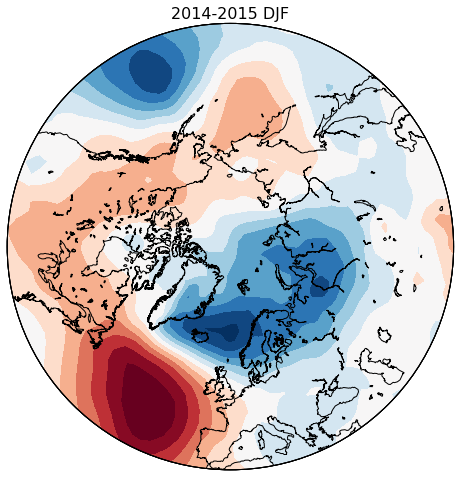

In [51]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

proj=Basemap(projection='npstere', resolution='l', boundinglat=35, lon_0=0, round=True, ax=ax)
proj.drawcoastlines(linewidth=1.0, color='k')
x, y = proj(lon, lat)
proj.contourf(x, y, slpa_DJF, lev_dT, cmap=plt.cm.RdBu_r, extend='both')
ax.set_title('2014-2015 DJF', fontsize=16)

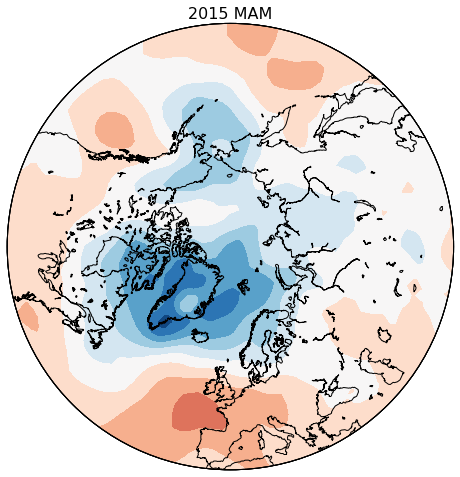

In [52]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

proj=Basemap(projection='npstere', resolution='l', boundinglat=35, lon_0=0, round=True, ax=ax)
proj.drawcoastlines(linewidth=1.0, color='k')
x, y = proj(lon, lat)
proj.contourf(x, y, slpa_MAM, lev_dT, cmap=plt.cm.RdBu_r, extend='both')
ax.set_title('2015 MAM', fontsize=16)

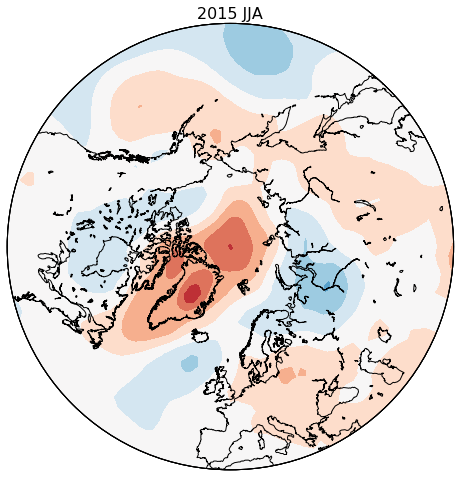

In [53]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

proj=Basemap(projection='npstere', resolution='l', boundinglat=35, lon_0=0, round=True, ax=ax)
proj.drawcoastlines(linewidth=1.0, color='k')
x, y = proj(lon, lat)
proj.contourf(x, y, slpa_JJA, lev_dT, cmap=plt.cm.RdBu_r, extend='both')
ax.set_title('2015 JJA', fontsize=16)

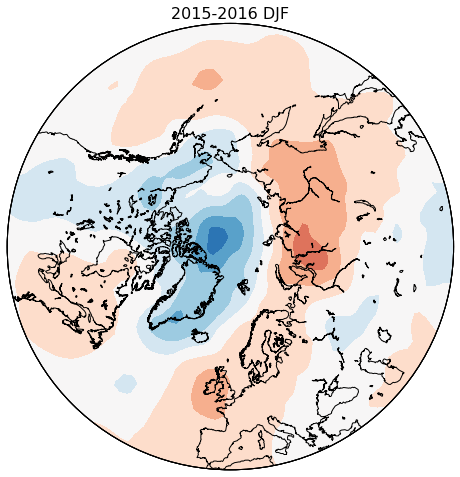

In [56]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()

proj=Basemap(projection='npstere', resolution='l', boundinglat=35, lon_0=0, round=True, ax=ax)
proj.drawcoastlines(linewidth=1.0, color='k')
x, y = proj(lon, lat)
proj.contourf(x, y, slpa_DJF2, lev_dT, cmap=plt.cm.RdBu_r, extend='both')
ax.set_title('2015-2016 DJF', fontsize=16)